# Quarteto de Anscombe (Anscombe’s quartet)

Antes de realizar análises estatísticas inferenciais, é crucial dedicar tempo para uma compreensão profunda dos dados com os quais estamos lidando. Este processo começa com uma visualização eficaz dos dados, uma etapa crucial que fornece insights valiosos e facilita a identificação de padrões, tendências e anomalias. Visualizar os dados corretamente envolve a utilização de gráficos apropriados, como histogramas, gráficos de dispersão, diagramas de caixa e gráficos de barras, que ajudam a explorar a distribuição, a relação entre variáveis e a identificar comportamentos atípicos.

Na estatística, as visualizações gráficas desempenham um papel crucial, pois são ferramentas excepcionais para revelar tendências, características ou peculiaridades nos dados, que muitas vezes não são imediatamente evidentes através de métodos puramente numéricos. Em 1973, o estatístico [Francis Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) ilustrou de maneira notável essa importância com a criação de um conjunto de dados muito especial. Este conjunto, conhecido como o [Quarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), é composto por quatro grupos distintos de onze pontos cada, formatados em pares (x, y).

A singularidade e importância do Quarteto de Anscombe residem no fato de que, embora cada um dos quatro grupos de dados compartilhe propriedades estatísticas quase idênticas, como médias e variâncias similares e linhas de regressão linear muito parecidas, suas representações gráficas desvendam padrões marcadamente distintos. Esta discrepância destaca um conceito central: a visualização gráfica de dados pode revelar aspectos críticos que as estatísticas descritivas por si só podem não captar. Francis Anscombe, ao desenvolver este conjunto de dados, tinha como objetivo desafiar a noção prevalecente na época entre muitos estatísticos de que "os cálculos numéricos são precisos, enquanto os gráficos são apenas representações aproximadas".

O Quarteto de Anscombe ilustra de forma eloquente que, a visualização gráfica é indispensável na análise de dados, transcendendo o papel de simples ferramenta de aproximação para se tornar um elemento crucial na exploração e compreensão de conjuntos de dados. Sem a visualização, características únicas e insights valiosos podem ser perdidos, resultando em interpretações que são, no melhor dos casos, incompletas, e no pior, enganosas.

Portanto, a análise estatística inferencial exige uma compreensão aprofundada dos dados, um processo que inicia eficazmente com a visualização gráfica. Esta etapa, longe de ser superficial, é fundamental para revelar tendências, características e anomalias nos dados que podem não ser perceptíveis através de análises numéricas isoladas.

## Dataset Anscombe’s quartet

A biblioteca de visualização [Seaborn](http://seaborn.pydata.org/) inclui, entre seus conjuntos de dados de exemplo, o Quarteto de Anscombe. Para acessá-lo, basta usar a função `load_dataset("anscombe")`, e a biblioteca automaticamente fará o download do dataset a partir do seu repositório de exemplos.


In [1]:
# Mensagem de erro para o caso de um biblioteca não estar instalada.
ERROR_MENSAGEM = "A biblioteca {module_name} não está instalada.\nPor favor, instale-a usando 'pip install {module_name}' antes de executar este notebook."

In [2]:
# Import Pandas: a data analysis library.
try:
    import pandas as pd
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [3]:
# Import the Ordinary Least Squares (OLS) function from the statsmodels library.
try:
    import statsmodels.api as sm
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [4]:
# Import the Breusch-Pagan test function from the statsmodels library.
try:
    from statsmodels.stats.diagnostic import het_breuschpagan
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [5]:
# Import Matplotlib: a Python 2D plotting library.
try:
    import matplotlib.pyplot as plt
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [6]:
# Import Seaborn: a Python data visualization library based on matplotlib.
try:
    import seaborn as sns
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [7]:
%matplotlib inline

In [8]:
# Set seaborn style.
sns.set(style="ticks",
        color_codes=True,
        font_scale=1.1,
        rc={'figure.figsize': (10, 6)},
        palette="deep")

In [9]:
# Load the example dataset for Anscombe's quartet.
anscombe = sns.load_dataset("anscombe")
anscombe.shape

(44, 3)

In [10]:
# The size of the dataset.
anscombe.groupby('dataset').size()

dataset
I      11
II     11
III    11
IV     11
dtype: int64

## Estatísticas Descritivas

A característica mais notável deste conjunto de dados reside em apresentar estatísticas descritivas que produzem resultados idênticos.


In [11]:
# Summarize the dataset applying a groupby operation.
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Além disso, é interessante notar que a correlação é consistentemente a mesma, exatamente 0.8163662, em todos os quatro conjuntos de dados.


In [12]:
# Calculate the correlation across the dataset.
anscombe.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [13]:
# Summary statistics for the dataset.
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


## Visualizações

Agora, vamos destacar as notáveis diferenças existentes entre os conjuntos de dados.


<Axes: xlabel='x', ylabel='y'>

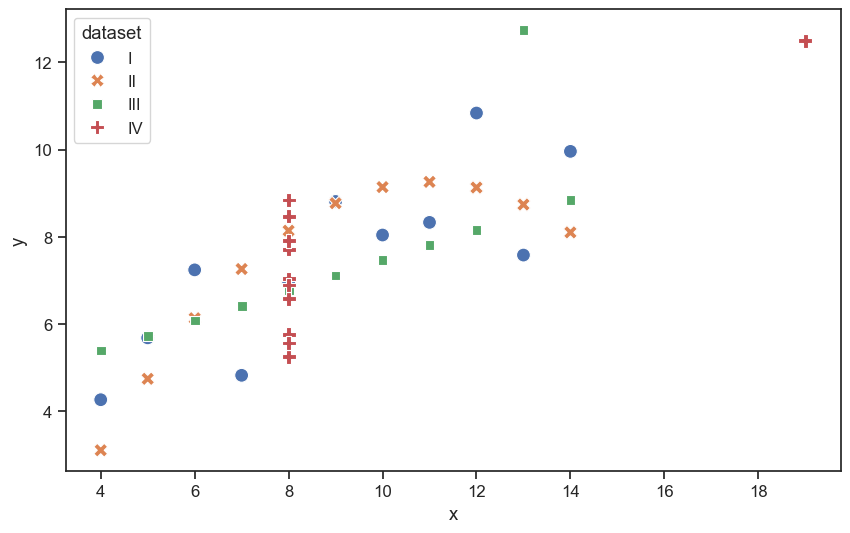

In [14]:
# Visualize the dataset.
sns.scatterplot(data=anscombe,
                x="x", y="y",
                hue="dataset",
                style="dataset",
                s=100)

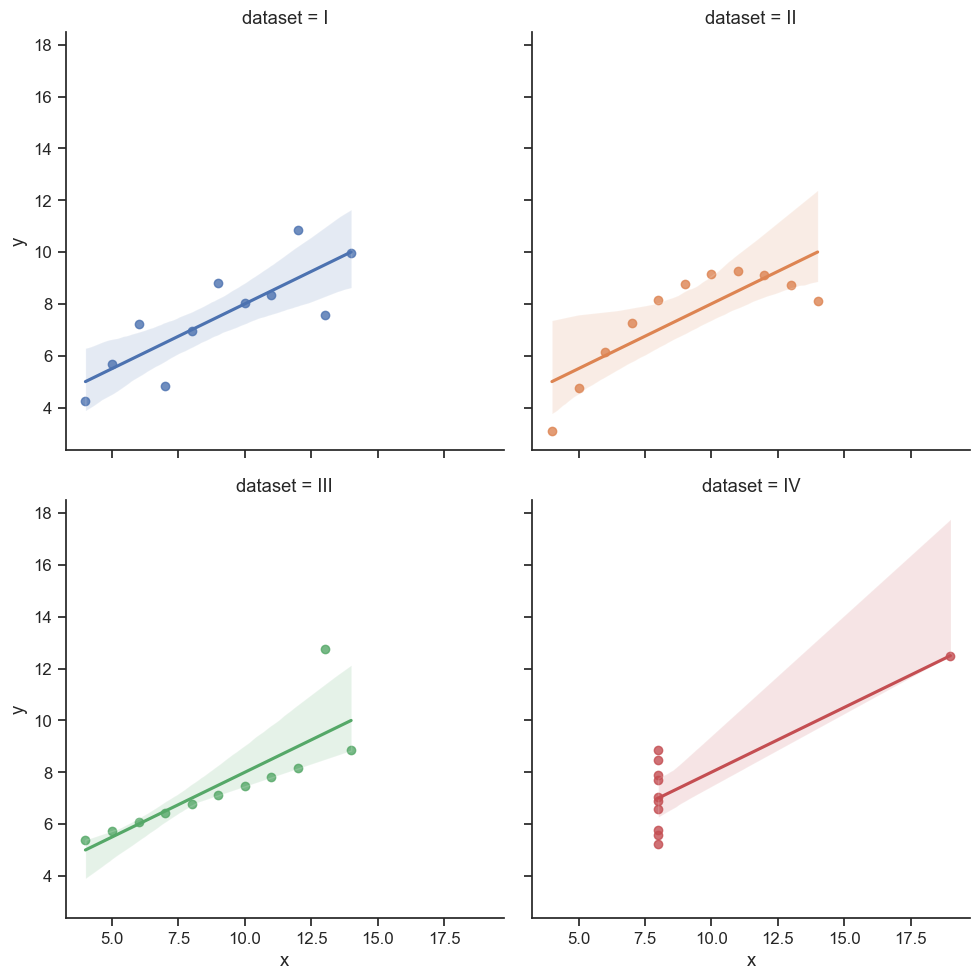

In [15]:
# A linear model plot of the dataset.
sns.lmplot(data=anscombe,
           x="x", y="y",
           col="dataset",
           hue="dataset",
           col_wrap=2)

-   O primeiro gráfico de dispersão, localizado no canto superior esquerdo, aparenta representar uma relação linear simples, indicando que as duas variáveis estão correlacionadas e que y pode ser modelado como uma variável gaussiana, cuja média depende linearmente de x.
-   O segundo gráfico, localizado no canto superior direito, não apresenta uma distribuição normal. Apesar de haver uma relação clara entre as duas variáveis, esta não é linear, tornando não pertinente o coeficiente de correlação de Pearson. Uma abordagem de regressão que inclua um termo quadrático ($x^2$) seria mais adequada para este conjunto de dados.
-   No terceiro gráfico, localizado no canto inferior esquerdo, observa-se uma distribuição linear, mas com a necessidade de uma linha de regressão distinta, possivelmente uma regressão robusta. Esta necessidade é devida à presença de um outlier que exerce influência significativa, suficiente para reduzir o coeficiente de correlação de 1 para 0.816.
-   Finalmente, o quarto gráfico, situado no canto inferior direito, demonstra um caso em que um único ponto de alta influência é suficiente para gerar um elevado coeficiente de correlação, apesar dos demais pontos de dados não sugerirem qualquer relação entre as variáveis. Este exemplo ressalta como um outlier pode distorcer significativamente a análise estatística, enfatizando a importância de uma avaliação cuidadosa dos dados.


## Modelos de Regressão

O aspecto mais interessante é que, ao aplicarmos uma regressão linear aos quatro conjuntos, obtemos os mesmos valores de _p_, coeficientes, _R²_ e _R² ajustado_ para todos eles. Observe os detalhes na tabela a seguir:


In [16]:
# A linear regression model for each dataset.
models = [sm.OLS(anscombe.query("dataset == @dataset")["y"],
                 sm.add_constant(anscombe.query("dataset == @dataset")["x"])).fit() for dataset in anscombe["dataset"].unique()]

In [17]:
# Summary statistics for each model.
models_summary = pd.DataFrame(columns=["Conjunto",
                                       "estimate",
                                       "std.error",
                                       "p.value.x",
                                       "conf.low",
                                       "conf.high",
                                       "r.squared",
                                       "adj.r.squared"])

In [18]:
# Populate the summary statistics.
for i, result in enumerate(models, start=1):
    summary = {"Conjunto": i,
               "estimate": result.params['x'],
               "std.error": result.bse['x'],
               "p.value.x": result.pvalues['x'],
               "conf.low": result.conf_int().loc['x', 0],
               "conf.high": result.conf_int().loc['x', 1],
               "r.squared": result.rsquared,
               "adj.r.squared": result.rsquared_adj}
    models_summary.loc[i] = summary

In [19]:
print("Modelo de Regressão Linear do Quarteto de Anscombe")
models_summary

Modelo de Regressão Linear do Quarteto de Anscombe


,Conjunto,estimate,std.error,p.value.x,conf.low,conf.high,r.squared,adj.r.squared
1,1,0.500091,0.117906,0.002170,0.233370,0.766812,0.666542,0.629492
2,2,0.500000,0.117964,0.002179,0.233147,0.766853,0.666242,0.629158
3,3,0.499727,0.117878,0.002176,0.233069,0.766385,0.666324,0.629249
4,4,0.499909,0.117819,0.002165,0.233384,0.766434,0.666707,0.629675


Uma abordagem eficaz para distinguir os quatro conjuntos de dados de Anscombe em uma análise de regressão linear é examinando seus resíduos, conforme ilustrado no gráfico a seguir. Observa-se que, especificamente no gráfico do canto superior direito, os resíduos não apresentam padrões ou características discerníveis, destacando-se dos demais conjuntos.


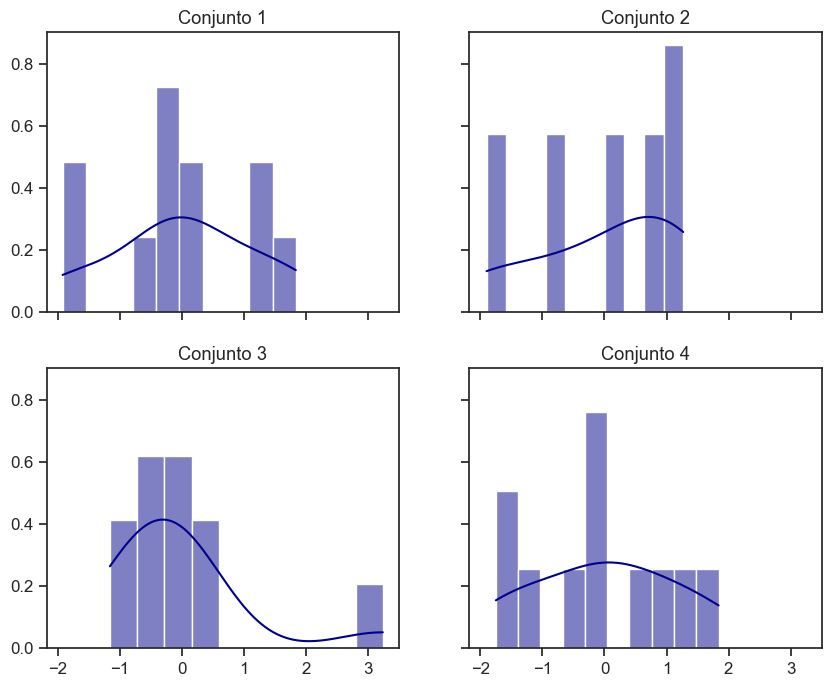

In [20]:
fig, axs = plt.subplots(nrows=2,
                        ncols=2,
                        figsize=(10, 8),
                        sharex=True,
                        sharey=True)
axs = axs.flatten()

for i, model in enumerate(models):
    sns.histplot(model.resid,
                 ax=axs[i],
                 kde=True,
                 bins=10,
                 color="darkblue",
                 stat="density",
                 alpha=0.5)
    axs[i].set_title(f"Conjunto {i+1}")
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

Inclusive, ao aplicar o teste studentizado de Breusch-Pagan, todos os modelos não conseguem rejeitar a hipótese nula de que "a variância dos resíduos é constante." Este resultado pode ser atribuído, em grande parte, ao tamanho reduzido da amostra (n=11) em cada um dos quatro conjuntos de dados, limitação que afeta a robustez do teste.


In [21]:
# Breusch-Pagan test for heteroskedasticity.
breusch_pagan_results = [het_breuschpagan(
    model.resid, model.model.exog) for model in models]

In [22]:
print('Análise dos Resultados do Teste de Breusch-Pagan para Heterocedasticida\n')
for i, result in enumerate(breusch_pagan_results):
    print(f"Conjunto {i + 1}")
    print(f"LM Statistic: {result[0]}")
    print(f"LM-Test p-value: {result[1]}")
    print(f"F-Statistic: {result[2]}")
    print(f"F-Test p-value: {result[3]}\n")

Análise dos Resultados do Teste de Breusch-Pagan para Heterocedasticida

Conjunto 1
LM Statistic: 0.6553075561484165
LM-Test p-value: 0.4182214568018924
F-Statistic: 0.570125021826155
F-Test p-value: 0.46950658303498966

Conjunto 2
LM Statistic: 2.4424906541753444e-15
LM-Test p-value: 0.9999999605672998
F-Statistic: 1.9789768809423956e-15
F-Test p-value: 0.9999999653069757

Conjunto 3
LM Statistic: 2.7234169729360658
LM-Test p-value: 0.09888612104791304
F-Statistic: 2.9614579683760676
F-Test p-value: 0.1193791006601893

Conjunto 4
LM Statistic: 1.182091037067803
LM-Test p-value: 0.2769307127739395
F-Statistic: 1.0836135651468557
F-Test p-value: 0.32504592762358736



## Comentários Finais

O Quarteto de Anscombe, introduzido por Francis Anscombe em 1973, serve como uma demonstração instrutiva e enfática sobre a importância crucial das visualizações na análise de dados. Este conjunto, composto por quatro diferentes grupos de dados, sublinha a mensagem de que a inspeção gráfica dos dados deve preceder qualquer forma de análise estatística. O quarteto é particularmente revelador ao evidenciar situações nas quais as propriedades estatísticas básicas, como média, variância e coeficiente de correlação, são insuficientes para capturar a essência dos dados. Cada um dos quatro conjuntos, apesar de compartilhar quase as mesmas estatísticas descritivas, exibe comportamentos distintos quando representados graficamente. Isso ilustra vividamente que a dependência exclusiva em estatísticas resumidas pode ser enganosa, destacando assim a necessidade de uma análise exploratória de dados mais profunda e visualmente orientada para uma compreensão integral dos dados em análise.


### Informações do ambiente


In [23]:
# Python version.
import sys
print(f"Python version: {sys.version}")
# Pandas version.
print(f"Pandas version: {pd.__version__}")
# Matplotlib version.
print(f"Matplotlib version: {plt.matplotlib.__version__}")
# Seaborn version.
print(f"Seaborn version: {sns.__version__}")
# Statsmodels version.
print(f"Statsmodels version: {sm.__version__}")

Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
Pandas version: 2.1.3
Matplotlib version: 3.8.2
Seaborn version: 0.13.0
Statsmodels version: 0.14.0
